# <机器学习>课程 Lecture 2实验


## 线性回归模型

给定一组数据,其输入数据维度为1,输出数据维度为1.
请分别通过最小二乘法,梯度下降法和模拟退火法来拟合.

首先定义基类模型.

如果不带有偏置项,即为$y = w^T x$, 如果带有偏置项为$y = w^Tx + b$.

计算损失使用MSE损失,即$l = \frac{1}{2N} \sum_{i} (\hat y_i - y_i)^2$.

In [3]:
import numpy as np

class LinearRegressor():
    """
    线性回归模型
    """
    def __init__(self,
        c_in: int, c_out:int,
        init_mean: float, init_var: float,
        bias: bool = True
    ) -> None:
        '''
        c_in: 输入数据维度
        c_out: 输出数据维度
        init_mean: 初始化均值
        init_var: 初始化方差
        bias: 是否带有偏置项
        '''
        self.c_in = c_in
        self.c_out = c_out
        self.bias = bias

        if self.bias:
            weight_size = (c_in+1, c_out)
        else:
            weight_size = (c_in, c_out)

        # 初始化参数
        self.weight = np.random.normal(
            init_mean, init_var,
            size=weight_size)

    def predict(self, 
        x: np.ndarray,
        weight: np.ndarray=None
    )->np.ndarray:
        b = x.shape[0]
        if self.bias and x.shape[1] == self.c_in:
            x = np.concatenate([x, np.ones((b, 1))], axis=1)

        if weight is None:
            return np.matmul(x, self.weight)
        else:
            return np.matmul(x, weight)

    def mse_loss(self, 
        x:np.ndarray, 
        y:np.ndarray,
        weight: np.ndarray=None
    )-> np.ndarray:
        b = x.shape[0]
        if self.bias and x.shape[1] == self.c_in:
            x = np.concatenate([x, np.ones((b, 1))], axis=1)

        y_hat = self.predict(x, weight)
        loss_val = np.sum((y_hat - y) ** 2) / (2 * b)

        return loss_val


从文件中读取数据用于后续实验.

In [4]:
from sklearn.model_selection import train_test_split

data_filename = "linear_data_0302_1217.npy"
linear_data = np.load(data_filename)
x_data, y_data = linear_data[0, :, np.newaxis], linear_data[1, :, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True
)

# x_data in [b, c_in]
c_in = x_data.shape[1]
# y_data in [b, c_out]
c_out = y_data.shape[1]

### 最小二乘法

请补充代码,完成最小二乘法拟合的线性回归模型.

权重计算为$w = (x^Tx)^{-1}x^Ty$.

In [5]:

class LeastSquareRegressor(LinearRegressor):
    """
    使用最小二乘法拟合线性模型
    """
    def __init__(self,
        c_in: int, c_out: int,
        init_mean: float, init_var: float,
        bias: bool = True
    ) -> None:

        super().__init__(c_in, c_out, init_mean, init_var, bias)

    def fit_least_square(self,
        x: np.ndarray, y: np.ndarray
    )-> None:
        '''
        使用最小二乘法
        '''
        
        b = x.shape[0]

        if self.bias and x.shape[1] == self.c_in:
            x = np.concatenate([x, np.ones((b, 1))], axis=1)

        # === 请补全权重更新机制 ===
        # self.weight = ?
        self.weight = np.matmul(
            np.linalg.inv(np.matmul(x.T, x)),
            np.matmul(x.T, y)
        )

从文件中加载数据,并使用最小二乘法拟合

In [6]:

model = LeastSquareRegressor(c_in, c_out, 0, 0.1, True)
model.fit_least_square(x_train, y_train)

if model.bias:
    print("weight: ", model.weight[:-1, :])
    print("bias: ", model.weight[-1, :])
else:
    print("weight: ", model.weight)
print(model.mse_loss(x_test, y_test))

weight:  [[1.04240415]]
bias:  [3.79585948]
11.566335183878804


绘制测试集数据和拟合到的模型预测结果.

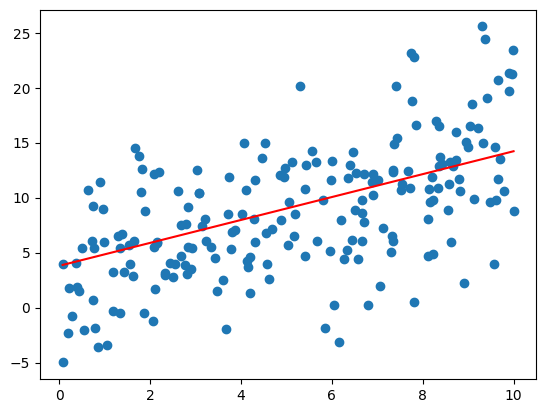

In [7]:
from matplotlib import pyplot as plt

def display_linear_regression(x_test, y_test, regressor):
    plt.figure()

    xx = np.linspace(np.min(x_test), np.max(x_test), 1000)
    yy = regressor.predict(xx[:, np.newaxis])

    plt.scatter(x_test, y_test)
    plt.plot(xx, yy, c='red')
    plt.show()

display_linear_regression(x_test, y_test, model)


### 梯度下降法

请补全代码,完成梯度下降法拟合的线性模型.

计算梯度为$grad = x^T(\hat y - y)$.


In [8]:

class GradientDescentRegressor(LinearRegressor):
    """
    使用梯度下降法拟合线性模型
    """
    def __init__(self,
        c_in: int, c_out: int,
        init_mean: float, init_var: float,
        bias: bool = True
    ) -> None:

        super().__init__(c_in, c_out, init_mean, init_var, bias)

    def fit_gradient_descent(self,
        x: np.ndarray, y: np.ndarray,
        step: float=0.01,
        iteration: int=1000
    )->None:
        '''
        使用梯度下降法拟合
        '''
        b = x.shape[0]

        if self.bias and x.shape[1] == self.c_in:
            x = np.concatenate([x, np.ones((b, 1))], axis=1)

        # === 请补全梯度计算和梯度更新机制 ===
        for idx in range(iteration):
            grad = np.matmul(x.T, np.matmul(x, self.weight) - y) / b
            self.weight -= step * grad

In [9]:

model = GradientDescentRegressor(c_in, c_out, 0, 0.1, True)
model.fit_gradient_descent(x_train, y_train, 0.001, 100)

if model.bias:
    print("weight: ", model.weight[:-1, :])
    print("bias: ", model.weight[-1, :])
else:
    print("weight: ", model.weight)
print(model.mse_loss(x_test, y_test))

weight:  [[1.5241368]]
bias:  [0.29770844]
12.00546420784377


### 模拟退火法

请补全代码,使用模拟退火法拟合线性模型.

具体操作如下:
1. 首先拟合线性模型.
2. 为当前模型权重添加扰动.
3. 重新拟合,比较新模型是否更优.

In [11]:
from copy import deepcopy

class SimulatedAnnealing(object):
    def __init__(self, c_in, c_out, init_mean, init_var, bias) -> None:
        # 定义线性模型
        self.model = GradientDescentRegressor(c_in, c_out, init_mean, init_var, bias)

    def fit(self,
        x, y, step,
        iterations: int = 100,
        rounds:int = 10,
        init_temp: float = 1.0
    ):
        # 首先使用给定的数据拟合线性模型
        self.model.fit_gradient_descent(x, y, step, iterations)

        # 初始化最优状态
        best_model = deepcopy(self.model)
        best_loss = self.model.mse_loss(x, y)
        print("init_loss = ", best_loss)

        temp = init_temp
        # 开始多轮迭代
        for round_idx in range(rounds):
            # 温度下降
            temp = temp * 0.9

            # 添加扰动更新权重
            cur_model = deepcopy(best_model)
            permute = np.random.normal(0, 0.1*temp, size=cur_model.weight.shape)
            cur_model.weight += permute

            # 在新状态下拟合并计算新状态的损失
            cur_loss = cur_model.mse_loss(x, y)

            print(f"#{round_idx}/{rounds}, temp = {temp:3f} best_loss = {best_loss:.4f} cur_loss = {cur_loss:.4f},")

            # 确认是否更新
            if cur_loss < best_loss:
                best_model = cur_model
                best_loss = cur_loss


model = SimulatedAnnealing(c_in, c_out, 0, 0.1, True)
model.fit(x_train, y_train, 0.01, 10, 10)

print(model.model.mse_loss(x_test, y_test))

init_loss =  14.229060983719819
#0/10, temp = 0.900000 best_loss = 14.2291 cur_loss = 14.4789,
#1/10, temp = 0.810000 best_loss = 14.2291 cur_loss = 14.1912,
#2/10, temp = 0.729000 best_loss = 14.1912 cur_loss = 14.1998,
#3/10, temp = 0.656100 best_loss = 14.1912 cur_loss = 14.2317,
#4/10, temp = 0.590490 best_loss = 14.1912 cur_loss = 14.2580,
#5/10, temp = 0.531441 best_loss = 14.1912 cur_loss = 14.0417,
#6/10, temp = 0.478297 best_loss = 14.0417 cur_loss = 13.9954,
#7/10, temp = 0.430467 best_loss = 13.9954 cur_loss = 13.9852,
#8/10, temp = 0.387420 best_loss = 13.9852 cur_loss = 14.0555,
#9/10, temp = 0.348678 best_loss = 13.9852 cur_loss = 13.9773,
12.03479134723516
